In [60]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
init_data =  pd.read_csv('kc_house_data.csv')
house_prices = init_data['price']
feature_data = init_data.drop('price', axis=1)  # axis =1 denotes to drop the column
print "Features and Prices are separated."
print "Prices have {} data points".format(*house_prices.shape)
print "Features have {} data points with {} features".format(*feature_data.shape)

Features and Prices are separated.
Prices have 21613 data points
Features have 21613 data points with 20 features


In [61]:
feature_data.drop('date',axis=1, inplace= True) # Drop Date column
feature_data.drop('id',axis=1, inplace=True) # Drop ID column
feature_data = (feature_data - feature_data.mean())/(feature_data.max() - feature_data.min()) # Normalize data
feature_train,feature_test,price_train,price_test = train_test_split(feature_data,house_prices) # Split data
lreg =  LinearRegression()
rf = RFE(lreg,5,step=1)
rf.fit(feature_train,price_train)
rf.support_
print "Using RFE, we determined the optimum features that we can use to build a reliable model."
print "And the features are:"
for i in range(0,feature_train.shape[1]):
    if rf.support_[i]:
        print feature_train.iloc[0:,i].name

Using RFE, we determined the optimum features that we can use to build a reliable model.
And the features are:
bedrooms
sqft_living
grade
sqft_above
sqft_basement


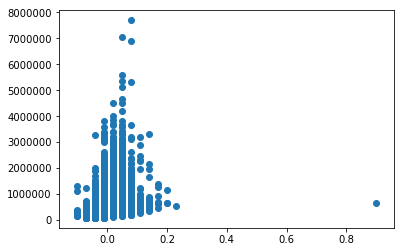

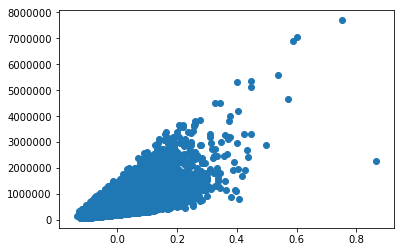

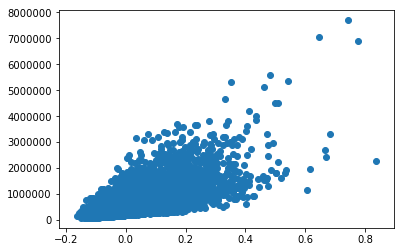

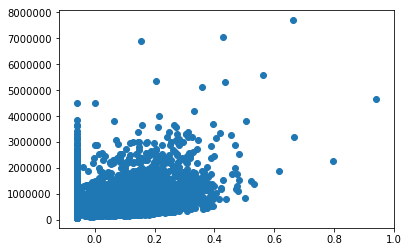

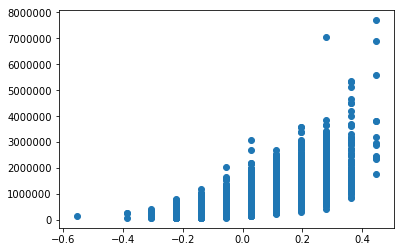

In [62]:
plt.scatter(feature_data['bedrooms'], house_prices)
plt.show()
plt.scatter(feature_data['sqft_living'], house_prices)
plt.show()
plt.scatter(feature_data['sqft_above'], house_prices)
plt.show()
plt.scatter(feature_data['sqft_basement'], house_prices)
plt.show()
plt.scatter(feature_data['grade'], house_prices)
plt.show()
